In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np

In [19]:
df = pd.read_excel('C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Quitar tendencia.xlsx', header = 0)
df

,Fecha,USO,PROF,ACCESO,FINDEX,GLOBAL,BANKCON,FINOP
0,2001-03-31,4.760516,-2.870854,-1.436736,-3.807952,12.476667,1634.992153,10.244489
1,2001-06-30,4.619391,-2.942477,-1.409869,-3.796076,12.200000,1649.718781,9.878376
2,2001-09-30,4.738808,-2.928419,-1.406424,-3.821973,12.706667,1621.507379,9.289471
3,2001-12-31,4.616833,-2.799275,-1.386445,-3.698861,13.203333,1598.407074,7.806468
4,2002-03-31,3.818590,-2.763255,-1.390579,-3.439288,12.993333,1567.965812,7.522508
...,...,...,...,...,...,...,...,...
82,2021-09-30,-0.155414,1.307032,0.880774,1.232960,15.193333,2128.259869,14.002105
83,2021-12-31,-0.419392,1.386735,0.844950,1.343564,15.016667,2112.999836,12.507705
84,2022-03-31,-0.473067,1.565242,0.829794,1.459574,14.810000,2091.711484,9.773907
85,2022-06-30,-0.395853,1.681651,0.822216,1.502557,14.910000,2071.838935,10.539341


In [20]:
# Descomposición aditiva
result = seasonal_decompose(df['FINDEX'], model='additive', period=4)  # Ajusta el periodo según tus datos
df['tendencia'] = result.trend
df['sin_tendencia'] = result.resid
df['sin_tendencia']

0          NaN
1          NaN
2    -0.084761
3    -0.088373
4    -0.051786
        ...   
82   -0.002458
83    0.015537
84    0.024633
85         NaN
86         NaN
Name: sin_tendencia, Length: 87, dtype: float64

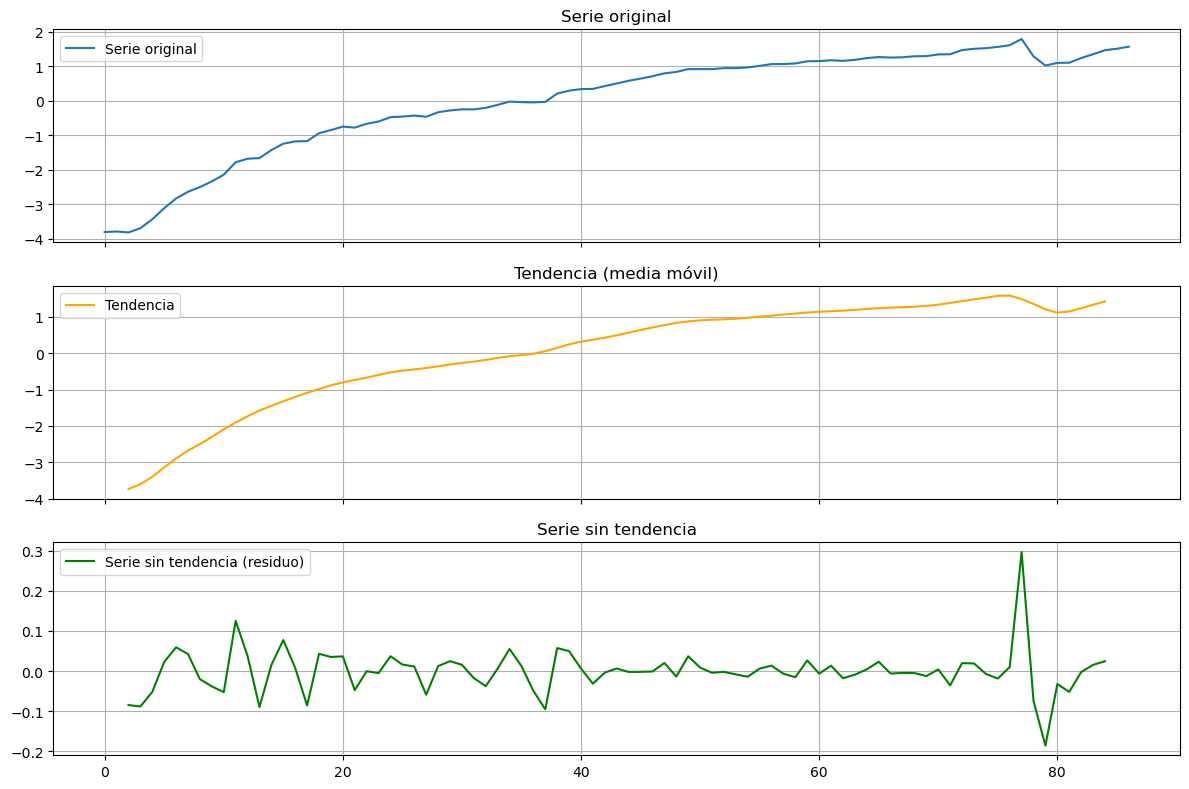

In [21]:
import matplotlib.pyplot as plt

# Asume que ya hiciste seasonal_decompose y tienes "result"
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(df['FINDEX'], label='Serie original')
axes[0].set_title('Serie original')

axes[1].plot(df['tendencia'], label='Tendencia', color='orange')
axes[1].set_title('Tendencia (media móvil)')

axes[2].plot(df['sin_tendencia'], label='Serie sin tendencia (residuo)', color='green')
axes[2].set_title('Serie sin tendencia')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller # Importar el test ADF
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fechas sea el índice, si no lo es ya
# Esto es crucial para que statsmodels maneje bien las series de tiempo
# Suponiendo que tu primera columna de fechas se llama 'Fecha'
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df = df.set_index('Fecha')
    # df = df.asfreq(pd.infer_freq(df.index)) # Inferir la frecuencia para un mejor manejo por statsmodels

# Descomposición aditiva
# Asegúrate de que el 'period' es el correcto para la estacionalidad de tu variable FINDEX
# Agregamos extrapolate_trend para manejar los NaNs en los extremos
result = seasonal_decompose(df['FINDEX'], model='additive', period=4)
df['tendencia_FINDEX'] = result.trend
df['estacionalidad_FINDEX'] = result.seasonal # También puedes guardar la estacionalidad
df['sin_tendencia_FINDEX'] = result.resid

In [25]:
df['sin_tendencia_FINDEX']

Fecha
2001-03-31         NaN
2001-06-30         NaN
2001-09-30   -0.084761
2001-12-31   -0.088373
2002-03-31   -0.051786
                ...   
2021-09-30   -0.002458
2021-12-31    0.015537
2022-03-31    0.024633
2022-06-30         NaN
2022-09-30         NaN
Freq: QE-DEC, Name: sin_tendencia_FINDEX, Length: 87, dtype: float64

--- Test de Dickey-Fuller Aumentado para: FINDEX Original ---
Test Statistic                 -5.007116
p-value                         0.000021
#Lags Used                      0.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64

Conclusiones:
Rechazamos la hipótesis nula (H0). La serie ES estacionaria (no tiene raíz unitaria).
--------------------------------------------------
--- Test de Dickey-Fuller Aumentado para: FINDEX sin Tendencia y Estacionalidad (Residuos) ---
Test Statistic                 -4.608811
p-value                         0.000124
#Lags Used                      7.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64

Conclusiones:
Rechazamos la hipótesis nula (H0). La serie ES estacionaria (no tiene ra

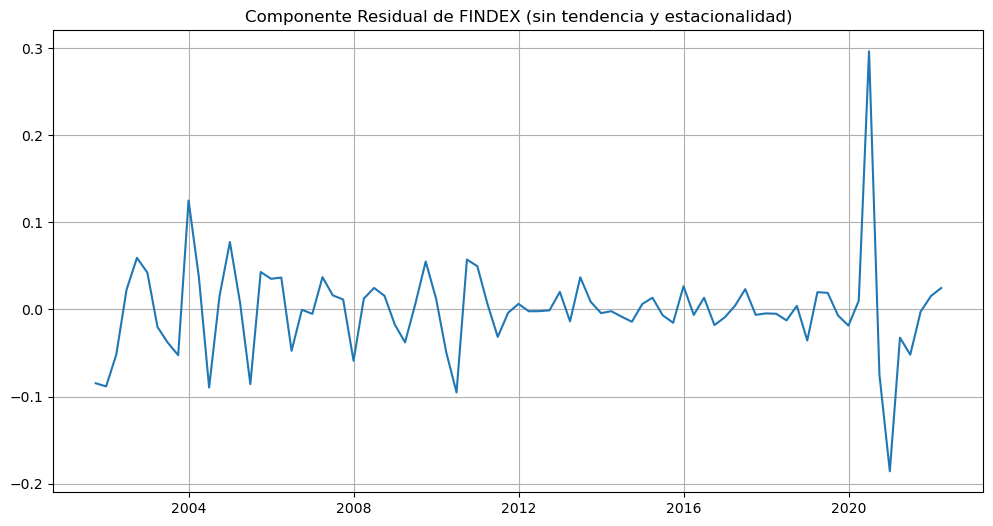

In [27]:

# --- Nuevo código para tests de estacionariedad ---

def adf_test(series, title=''):
    """
    Realiza el Test de Dickey-Fuller Aumentado en una serie y muestra los resultados.
    """
    print(f'--- Test de Dickey-Fuller Aumentado para: {title} ---')
    dftest = adfuller(series.dropna(), autolag='AIC') # .dropna() es importante para manejar los NaNs
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print("\nConclusiones:")
    if dftest[1] <= 0.05:
        print("Rechazamos la hipótesis nula (H0). La serie ES estacionaria (no tiene raíz unitaria).")
    else:
        print("No rechazamos la hipótesis nula (H0). La serie NO ES estacionaria (tiene raíz unitaria).")
    print("-" * 50)

# Realizar el test ADF para la serie original 'FINDEX'
adf_test(df['FINDEX'], title='FINDEX Original')

# Realizar el test ADF para la serie 'sin_tendencia_FINDEX' (residuos)
adf_test(df['sin_tendencia_FINDEX'], title='FINDEX sin Tendencia y Estacionalidad (Residuos)')

# Opcional: Visualiza los residuos para inspección visual
plt.figure(figsize=(12, 6))
plt.plot(df['sin_tendencia_FINDEX'])
plt.title('Componente Residual de FINDEX (sin tendencia y estacionalidad)')
plt.grid(True)
plt.show()

In [44]:
df['residuo_movil'].to_excel('Findex sin tendencia (media movil).xlsx')

# Sacando tendencia con medias móviles de 1 año

In [17]:
df = pd.read_excel('C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Quitar tendencia.xlsx', header = 0)
df

,Fecha,USO,PROF,ACCESO,FINDEX,GLOBAL,BANKCON,FINOP
0,2001-03-31,4.760516,-2.870854,-1.436736,-3.807952,12.476667,1634.992153,10.244489
1,2001-06-30,4.619391,-2.942477,-1.409869,-3.796076,12.200000,1649.718781,9.878376
2,2001-09-30,4.738808,-2.928419,-1.406424,-3.821973,12.706667,1621.507379,9.289471
3,2001-12-31,4.616833,-2.799275,-1.386445,-3.698861,13.203333,1598.407074,7.806468
4,2002-03-31,3.818590,-2.763255,-1.390579,-3.439288,12.993333,1567.965812,7.522508
...,...,...,...,...,...,...,...,...
82,2021-09-30,-0.155414,1.307032,0.880774,1.232960,15.193333,2128.259869,14.002105
83,2021-12-31,-0.419392,1.386735,0.844950,1.343564,15.016667,2112.999836,12.507705
84,2022-03-31,-0.473067,1.565242,0.829794,1.459574,14.810000,2091.711484,9.773907
85,2022-06-30,-0.395853,1.681651,0.822216,1.502557,14.910000,2071.838935,10.539341


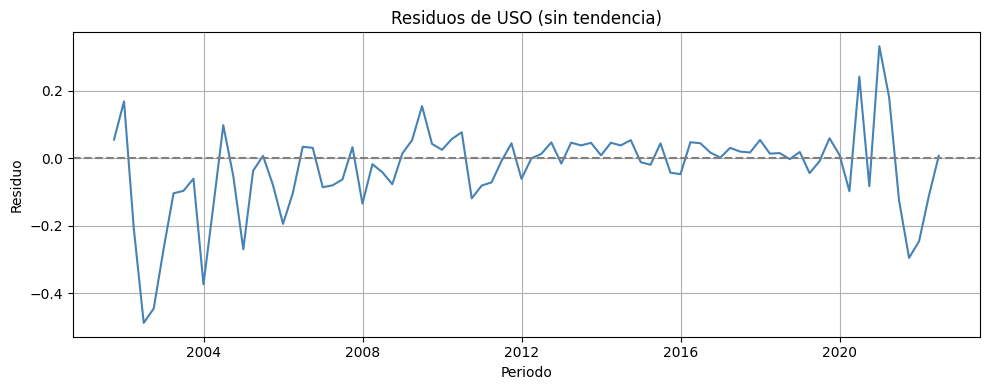

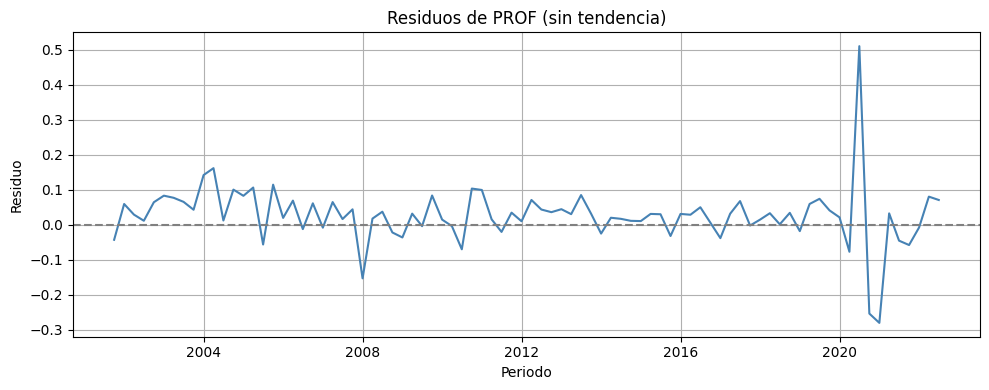

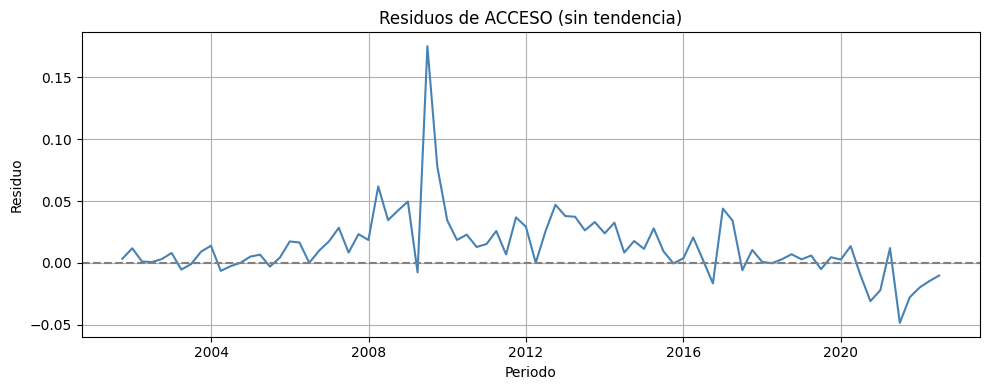

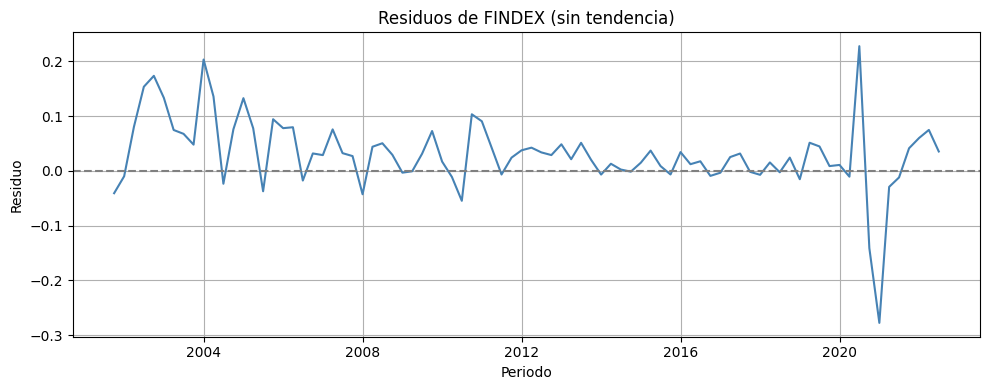

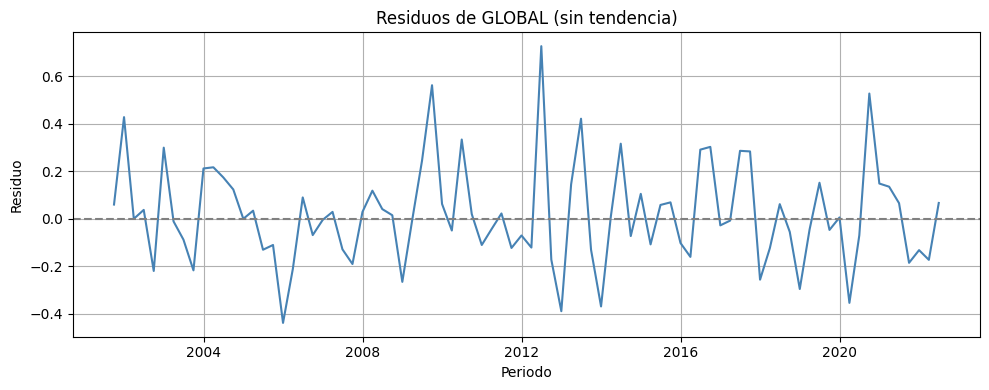

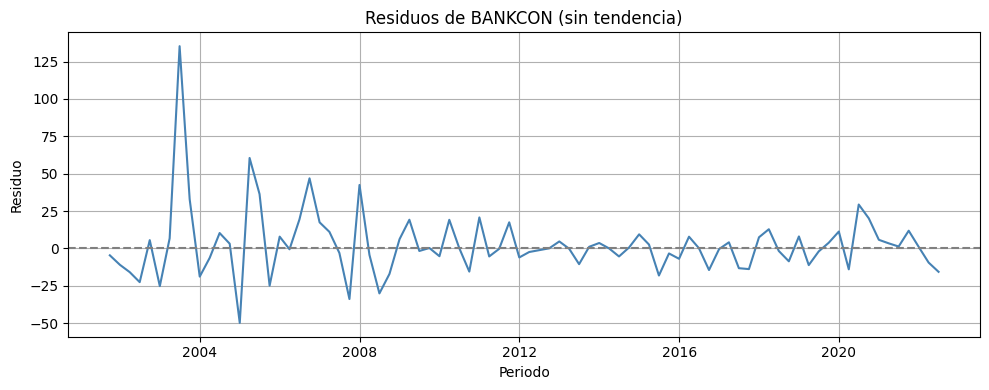

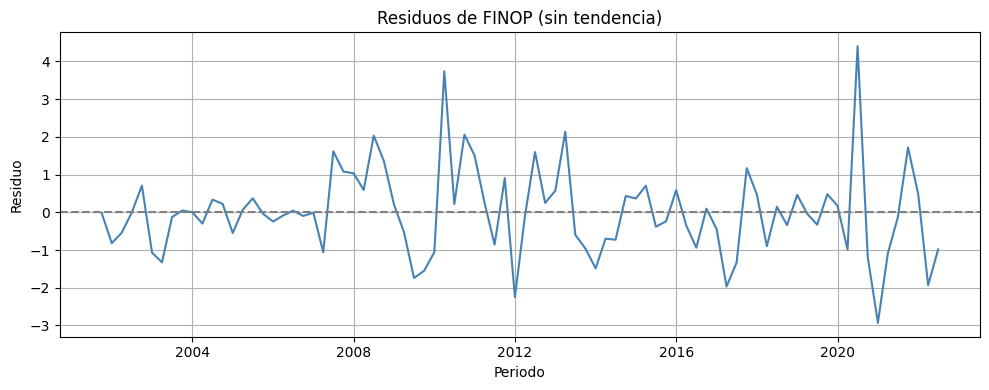

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que la primera columna es fecha o periodo
fecha_col = df.columns[0]
variables = df.columns[1:]

# DataFrame para residuos
residuos = pd.DataFrame()
residuos[fecha_col] = df[fecha_col]

# Calcular residuos (serie menos tendencia por media móvil)
for var in variables:
    tendencia = df[var].rolling(window=4, center=True).mean()
    residuos[f'{var}_resid'] = df[var] - tendencia

# Graficar un subplot por cada variable
for var in variables:
    plt.figure(figsize=(10, 4))
    plt.plot(residuos[fecha_col], residuos[f'{var}_resid'], color='steelblue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'Residuos de {var} (sin tendencia)')
    plt.xlabel('Periodo')
    plt.ylabel('Residuo')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exportar residuos a Excel
residuos.to_excel("Sin_tendencia.xlsx", index=False)


In [ ]:
residuos.to_excel("Sin_tendencia.xlsx", index=False)

# Aplicando Seasonal Decompose

Procesando las siguientes variables: ['USO', 'PROF', 'ACCESO', 'FINDEX', 'BANKCON']

Realizando descomposición para la variable: USO


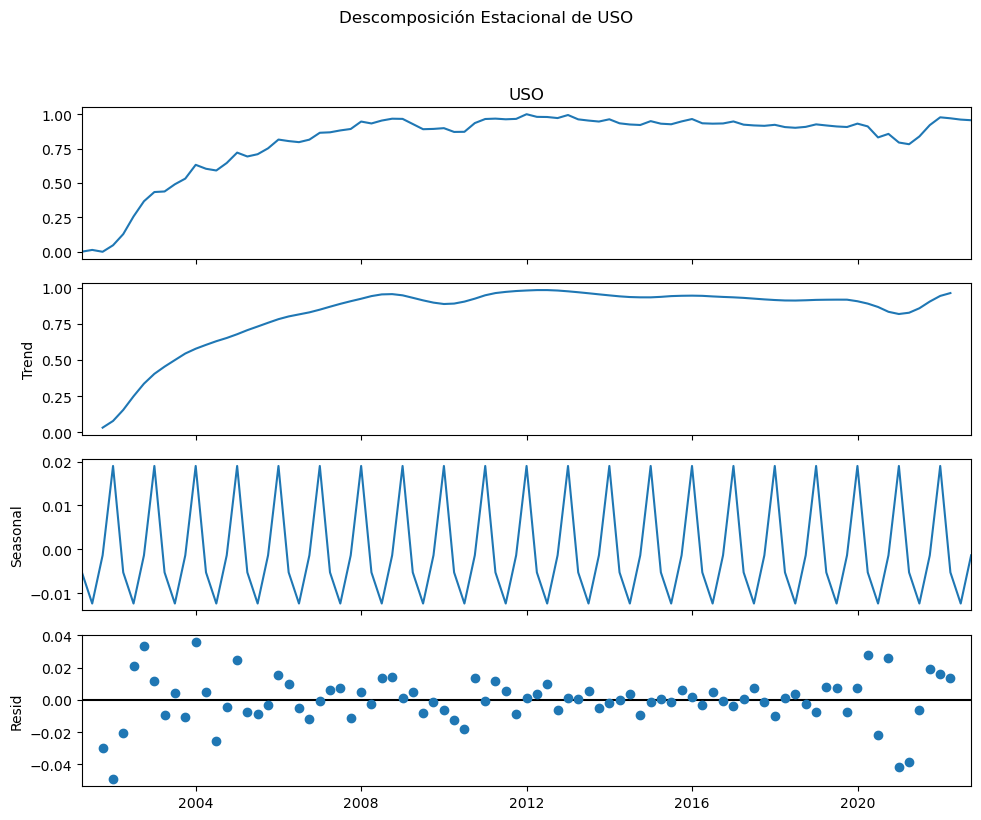

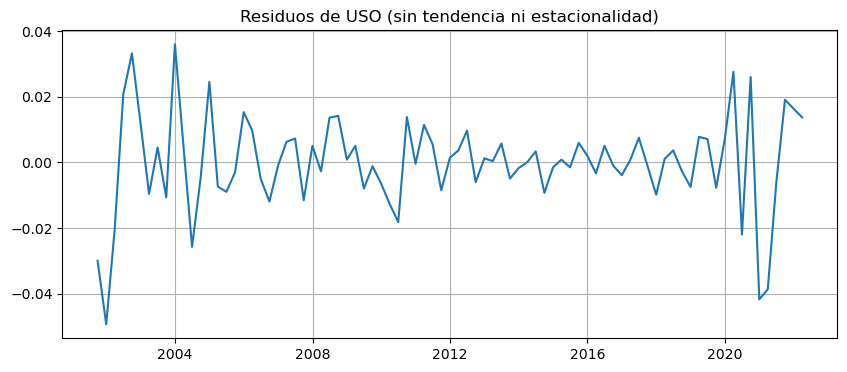


Realizando descomposición para la variable: PROF


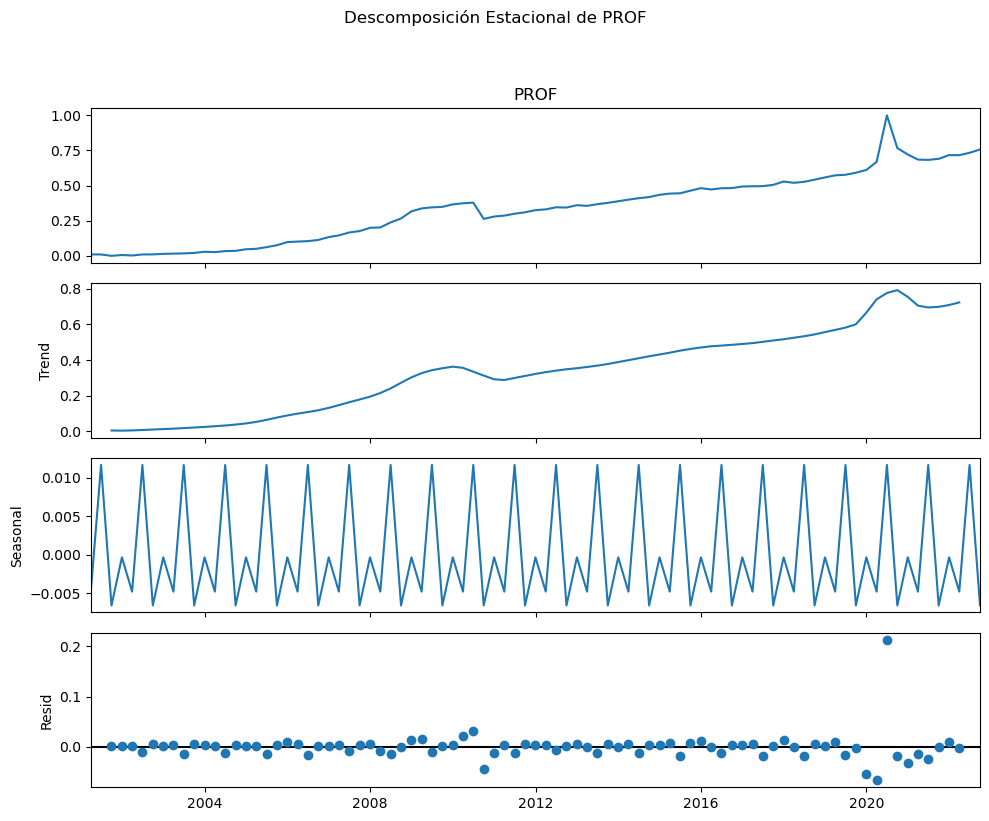

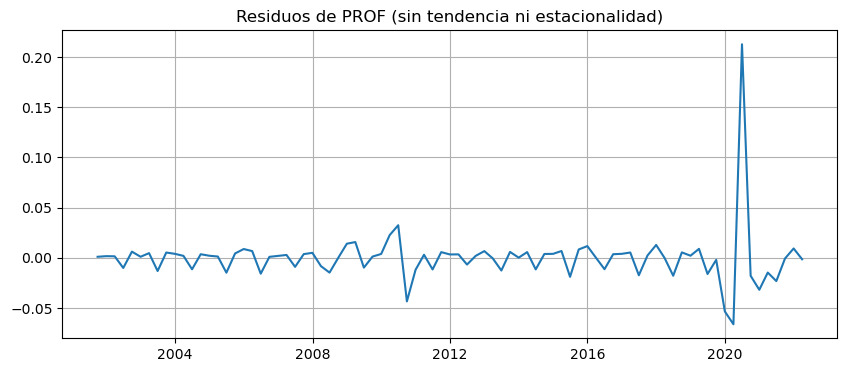


Realizando descomposición para la variable: ACCESO


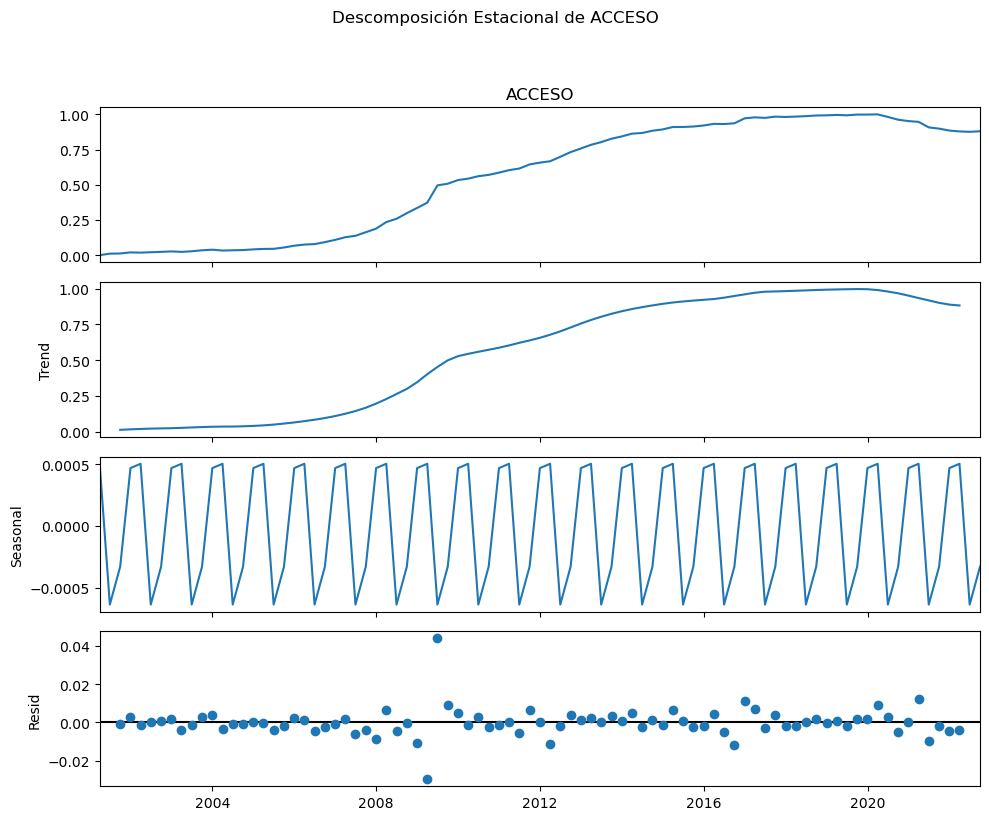

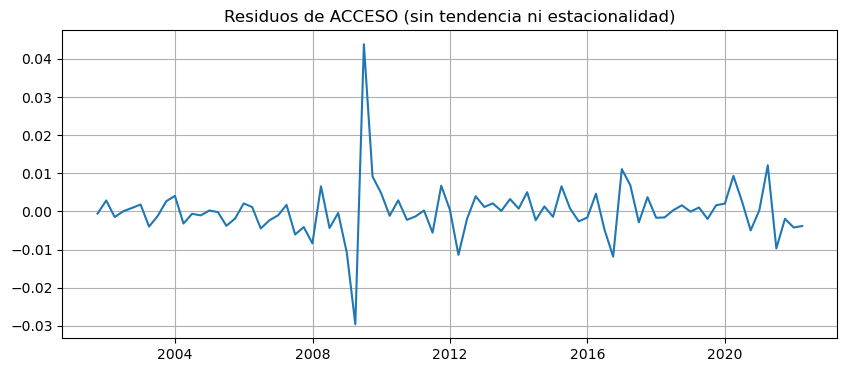


Realizando descomposición para la variable: FINDEX


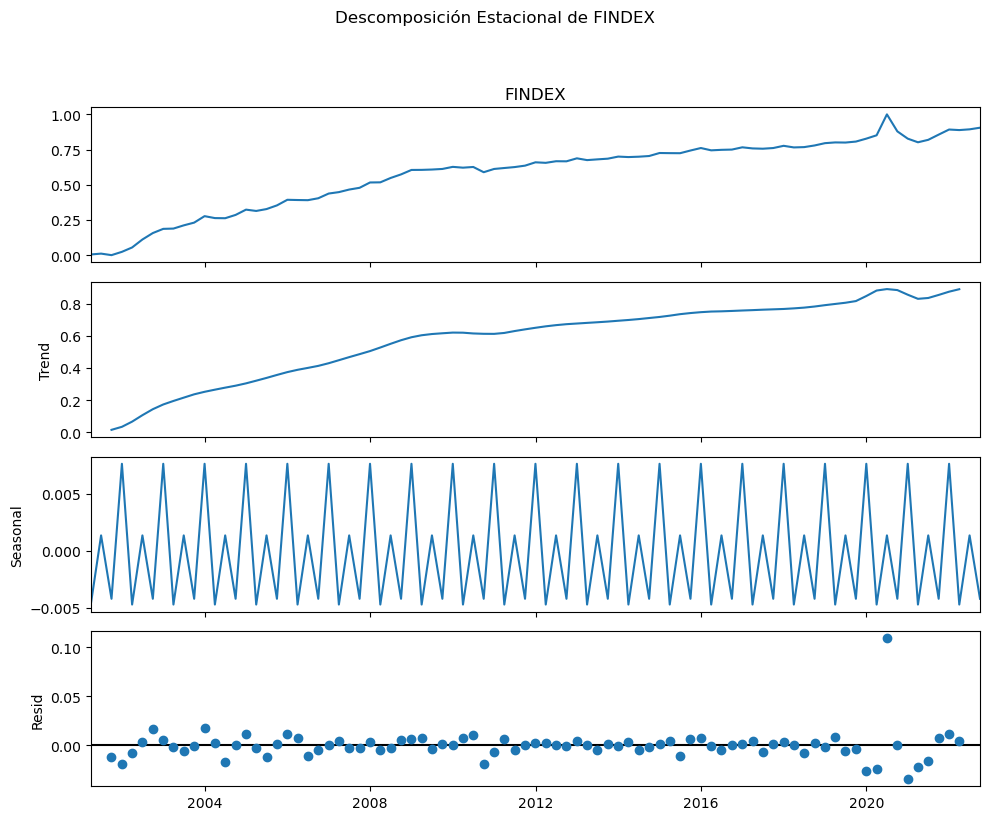

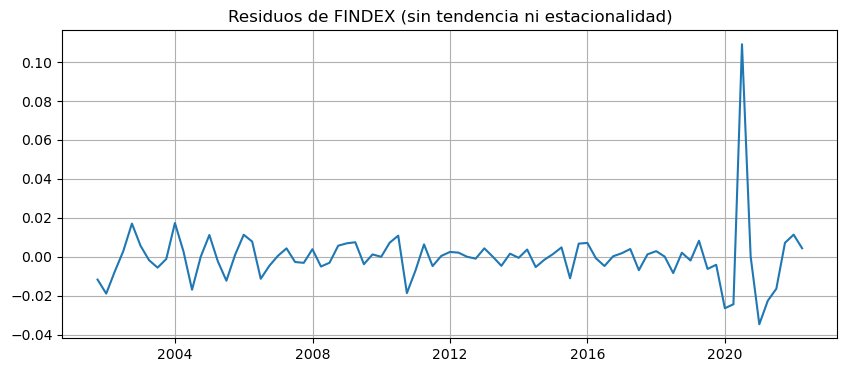


Realizando descomposición para la variable: BANKCON


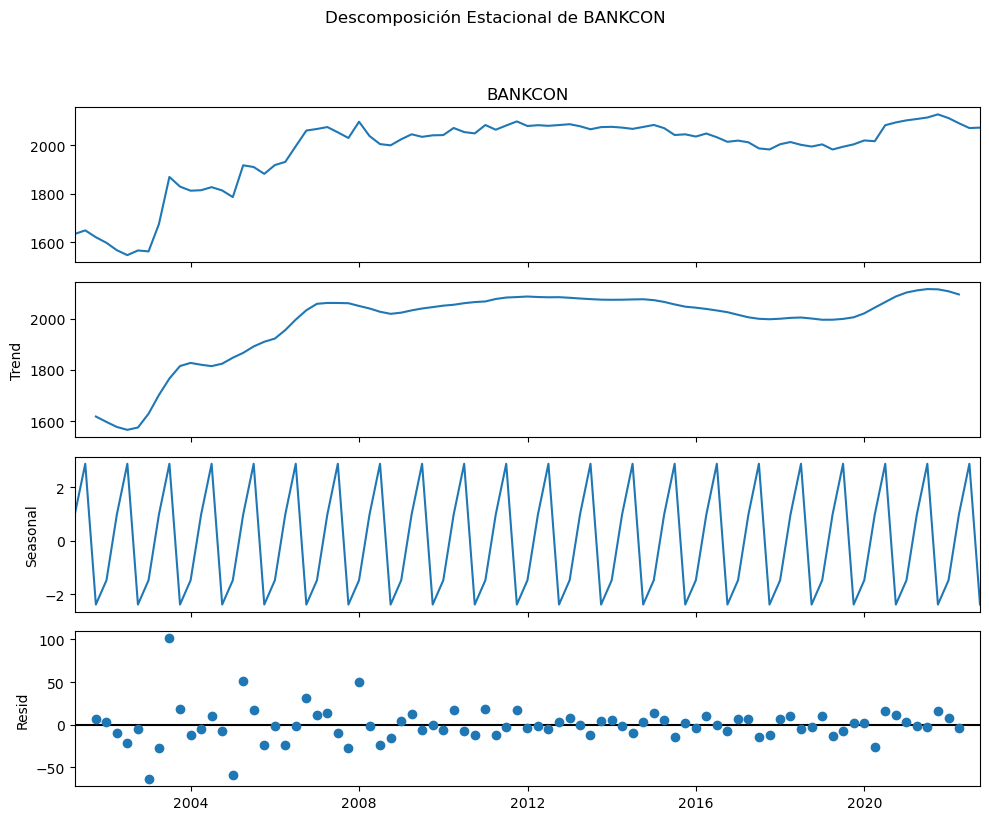

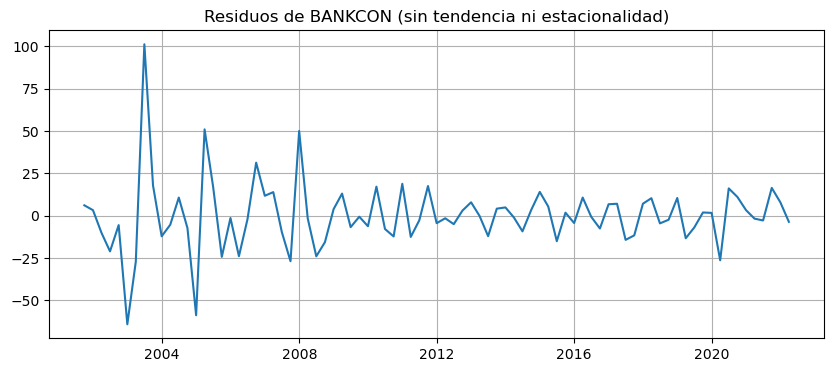


Residuos de todas las variables exportados a: C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Descomposicion aditiva.xlsx

Proceso completado.


In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os # Para manejar rutas de archivos

# --- Paso 1: Cargar el DataFrame ---
# Asegúrate de que la ruta del archivo sea correcta
file_path = 'C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Quitar tendencia.xlsx'
df = pd.read_excel(file_path, header=0)

# Asegúrate de que la columna de fechas sea el índice y tenga el tipo correcto
# Suponiendo que la primera columna se llama 'Fecha'
if df.columns[0] == 'Fecha': # Si la primera columna se llama 'Fecha'
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df = df.set_index('Fecha')
    df = df.asfreq(pd.infer_freq(df.index)) # Inferir la frecuencia para un mejor manejo por statsmodels
else:
    # Si la primera columna no se llama 'Fecha' pero es la de índice,
    # asume que ya está establecida o ajusta el nombre de la columna aquí
    # Por ejemplo, si es un índice sin nombre, puedes hacer:
    # df.index = pd.to_datetime(df.index)
    # df = df.asfreq(pd.infer_freq(df.index))
    print("Advertencia: La primera columna no se llama 'Fecha'. Asegúrate de que el índice sea de tipo datetime.")


# Crear un DataFrame para almacenar solo las series de residuos
df_residuos = pd.DataFrame(index=df.index)

# --- Paso 2: Iterar sobre cada variable y aplicar la descomposición ---
# Excluir la columna de índice (fechas) si se cuenta como columna en df.columns
variables_a_procesar = [col for col in df.columns if col != df.index.name] # Asegúrate de no procesar el índice si tiene nombre

# Ajusta el periodo de estacionalidad. Como indicaste que tus datos son trimestrales, 4 es adecuado para estacionalidad anual.
periodo_estacional = 4

print(f"Procesando las siguientes variables: {variables_a_procesar}")

for var in variables_a_procesar:
    print(f"\nRealizando descomposición para la variable: {var}")
    
    # Comprobar si la serie tiene suficientes datos para el periodo especificado
    if len(df[var].dropna()) < periodo_estacional * 2: # Necesita al menos 2 ciclos para una descomposición decente
        print(f"Advertencia: La serie '{var}' tiene menos de {periodo_estacional * 2} observaciones no nulas. La descomposición podría ser inestable o no posible.")
        # Puedes decidir si continuar o saltar esta variable
        continue 
    
    # Realizar la descomposición aditiva
    # Usamos extrapolate_trend para manejar los NaNs en los extremos
    try:
        result = seasonal_decompose(df[var].dropna(), model='additive', period=periodo_estacional)
        
        # Guardar los residuos en el DataFrame de residuos
        df_residuos[f'resid_{var}'] = result.resid
        
        # --- Plotear la descomposición para cada variable ---
        fig = result.plot()
        fig.set_size_inches(10, 8)
        plt.suptitle(f'Descomposición Estacional de {var}', y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar diseño para evitar solapamiento del título
        plt.show()

        # Opcional: Plotear solo la serie de residuos
        plt.figure(figsize=(10, 4))
        plt.plot(df_residuos[f'resid_{var}'])
        plt.title(f'Residuos de {var} (sin tendencia ni estacionalidad)')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al descomponer la variable '{var}': {e}")
        print("Asegúrate de que la serie no contenga solo NaNs o valores constantes.")
        continue

# --- Paso 3: Exportar el DataFrame de residuos a Excel ---
output_excel_path = 'C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Gráficos de Tesis/Sin tendencia/Descomposicion aditiva.xlsx'

try:
    df_residuos.to_excel(output_excel_path, index=True) # index=True para exportar la columna de fechas
    print(f"\nResiduos de todas las variables exportados a: {output_excel_path}")
except Exception as e:
    print(f"Error al exportar los residuos a Excel: {e}")

print("\nProceso completado.")

In [34]:
residuos.to_excel("Sin_tendencia_seasonal.xlsx", index=False)

NameError: name 'residuos' is not defined

In [42]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Leer la hoja "Data 2" y convertir la primera columna en índice de fechas
df = pd.read_excel("C:/Users/Tobby/OneDrive/Desktop/GABO/TESIS/Tesis-paper/Data y gráficos/Data final detalle.xlsx", sheet_name="Data 2", index_col=0, parse_dates=True)
df


,USO,PROF,ACCESO,FINDEX,BZSCORE,BANKCON,PBI,IPC,CONSUM,INVEST,VIX,TERMS
Fecha,,,,,,,,,,,,
2001-09-30,-0.029976,0.001041,-0.000570,-0.011715,-2.396101,6.115894,2.742307,1.465562,1.447658,-5.057991,26.156667,-2.814466
2001-12-31,-0.049350,0.001642,0.002873,-0.018905,-7.055955,3.246304,4.782608,0.222852,-0.644170,-6.633403,27.066667,6.173881
2002-03-31,-0.020398,0.001504,-0.001470,-0.007651,-2.658961,-10.068057,6.525020,-1.010751,5.092491,-1.392740,20.026667,5.950446
2002-06-30,0.020788,-0.010111,0.000037,0.002888,3.090741,-21.062426,6.633736,0.073275,4.448851,-2.847403,22.430000,6.946034
2002-09-30,0.033231,0.006154,0.000899,0.017061,-0.215948,-5.559732,4.071136,0.266336,4.897854,-1.497024,34.786666,7.240139
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,-0.038671,-0.014709,0.012088,-0.022577,-19.391330,-1.752675,4.337280,2.558388,3.916804,34.829597,26.813334,21.091747
2021-06-30,-0.006072,-0.023181,-0.009715,-0.016382,-8.270338,-2.817935,42.232351,2.694969,31.491697,173.945900,17.066667,18.030177
2021-09-30,0.019106,-0.000698,-0.001940,0.007193,-2.801702,16.393661,11.641210,4.665603,12.692991,25.270162,19.286666,3.932340


In [45]:

# Crear y ajustar el modelo VAR para determinar rezagos óptimos
modelo = VAR(df)

# Evaluar criterios de información hasta 10 rezagos (puedes ajustar según tu data)
criterios = modelo.select_order(maxlags=4)

# Mostrar resultados
print("Criterios de selección de rezagos:")
print(criterios.summary())

Criterios de selección de rezagos:
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -43.68     -43.32*   1.072e-19      -43.54
1      -46.66      -41.99   5.619e-21      -44.79
2      -48.75      -39.75  8.845e-22*     -45.14*
3      -47.92      -34.60   4.014e-21      -42.58
4     -50.43*      -32.80   1.560e-21      -43.37
-------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
